# Decision Tree With Python

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Check out the data
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
#x and y arrays
x = df.drop("salary_more_then_100k",axis=1)
y=df["salary_more_then_100k"]

In [5]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [6]:
x["company_n"] = le_company.fit_transform(x["company"])
x["job_n"] = le_company.fit_transform(x["job"])
x["degree_n"] = le_company.fit_transform(x["degree"])

In [7]:
x

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [8]:
x_n = x.drop(["company","job","degree"],axis=1)

In [9]:
x_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [10]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [11]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_n,y,test_size=0.3,random_state=101)

In [12]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=101)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [16]:
predictions = classifier.predict(X_test)
predictions

array([1, 0, 1, 1, 1], dtype=int64)

In [17]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score
matrix = confusion_matrix(y_test,predictions)
matrix

array([[0, 0],
       [1, 4]], dtype=int64)

In [18]:
tp, fn, fp, tn = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)

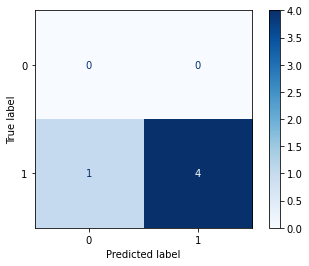

In [19]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=classifier.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



In [21]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.80
Error Rate:  0.2
Sensitivity (Recall or True positive rate) : 0.8
Specificity (True negative rate) : nan
Precision (Positive predictive value) : 1.0
False Positive Rate : nan


In [22]:
classifier.predict([[0,0,1]])

array([1], dtype=int64)

In [23]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
import pydot 
from sklearn.externals.six import StringIO  

features = list(x_n)
features

['company_n', 'job_n', 'degree_n']

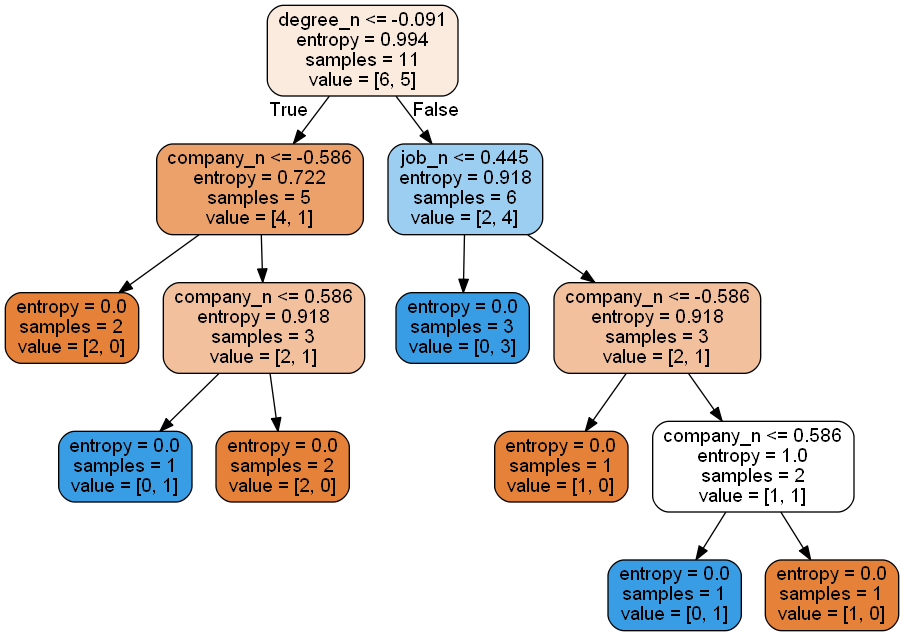

In [24]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())